# Spaceship Titanic

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

The task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help make these predictions, a set of personal records are recovered from the ship's damaged computer system.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the Data**

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# Data Field Descriptions
- **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

- **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

- **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

- **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

- **Destination** - The planet the passenger will be debarking to.

- **Age** - The age of the passenger.

- **VIP** - Whether the passenger has paid for special VIP service during the voyage.

- **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

- **Name** - The first and last names of the passenger.

- **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


# EDA

In [24]:
train.isna().mean() * 100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

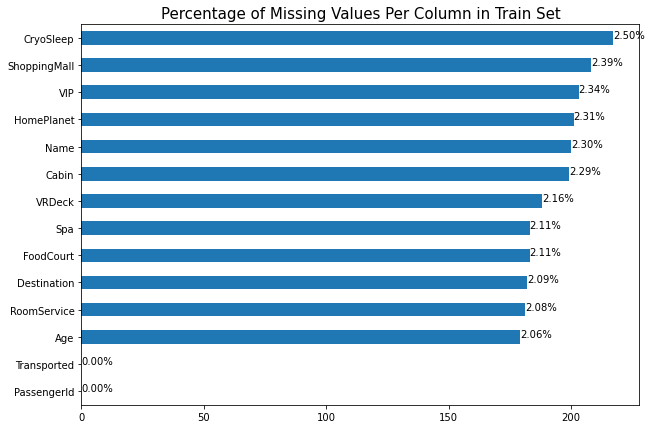

In [27]:
# Check if there any missing values in train set
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 7))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.2f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

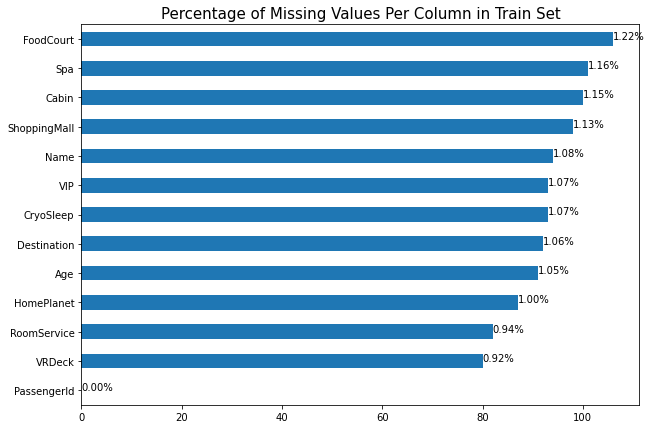

In [28]:
# Check if there any missing values in train set
ax = test.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 7))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.2f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [7]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [38]:
# Splitting the columns
cat_cols = ['HomePlanet', 'CryoSleep','Destination', 'VIP']
num_cols = ['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

**Plotting the Categorical Features**

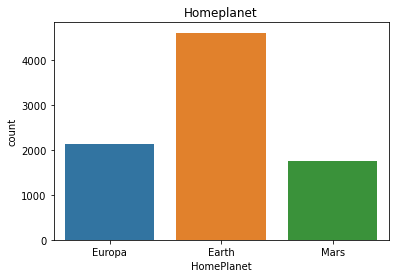

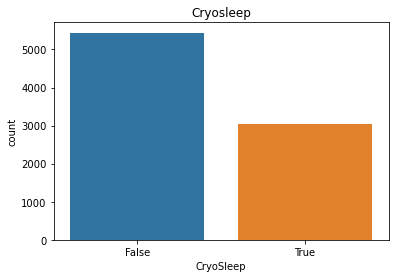

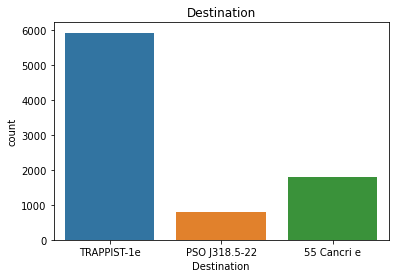

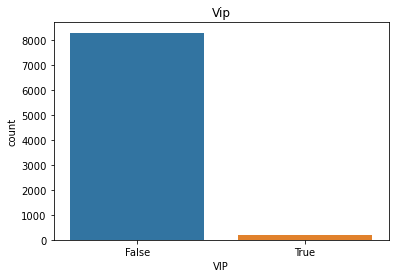

In [10]:
for cat in cat_cols:
    sns.countplot(x=cat, data=train)
    plt.title(cat.capitalize())
    plt.show()

**Plotting Numerical columns**

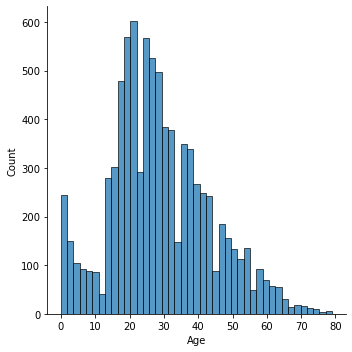

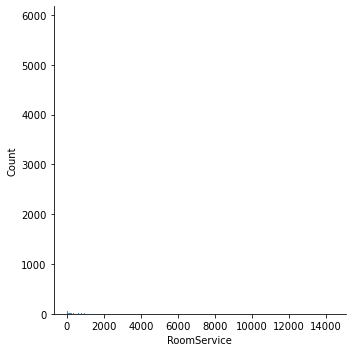

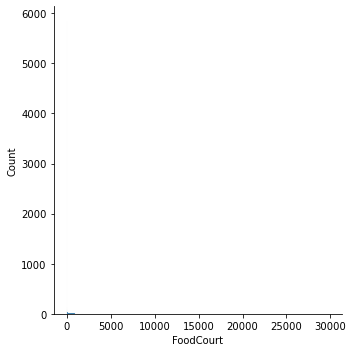

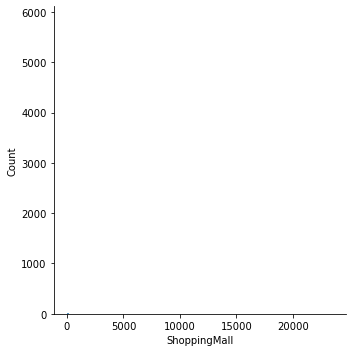

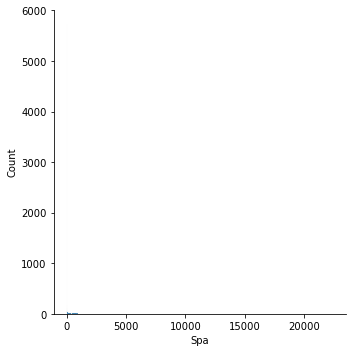

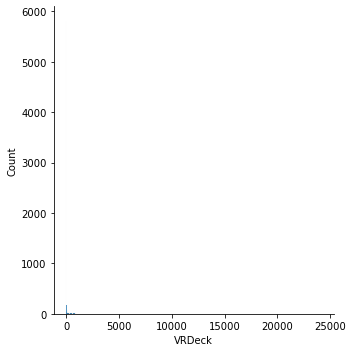

In [11]:
for num in num_cols:
    sns.displot(train[num])
    plt.show()

In [12]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


- The minimum age is 0. Is 0 age representing babies that haven't reaches 1 year?
- Most People actually didn't spend on the Luxury Amenities

<AxesSubplot:xlabel='Age'>

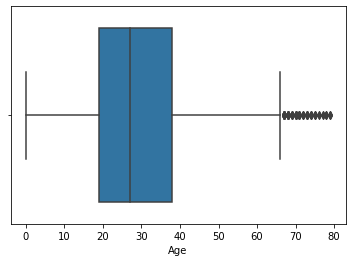

In [13]:
sns.boxplot(x='Age', data=train)

**Bivariate and Multivariate Analysis**

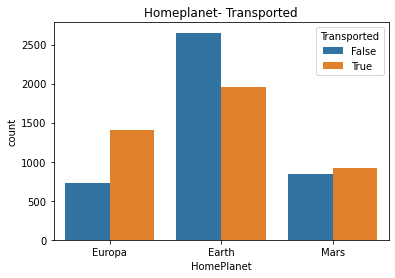

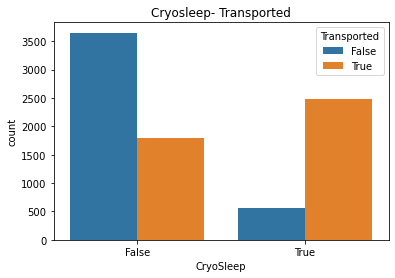

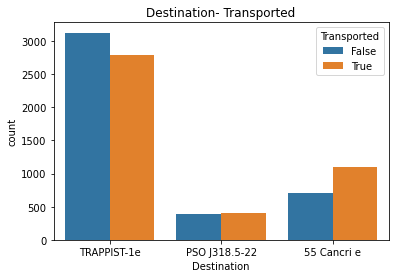

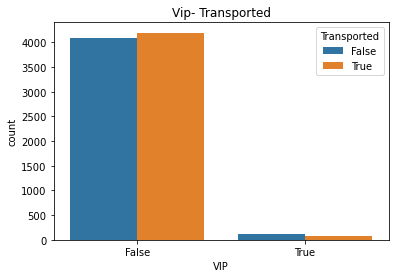

In [15]:
# plotting the categorical features with hue='Transported'
for cat in cat_cols:
    sns.countplot(x=cat, data=train, hue='Transported')
    plt.title(cat.capitalize() + '- Transported')
    plt.show()

**Insights to note**
- Many People from Europa were transported
- Many People who were in CrysoSleep were transported

The other Categorical Features have averagely balanced Transported count.

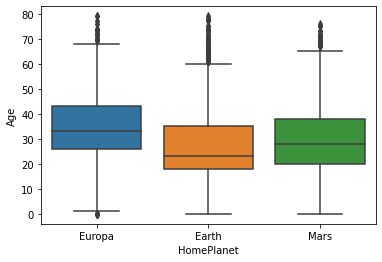

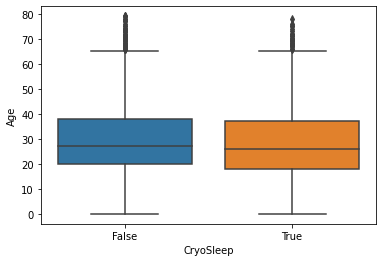

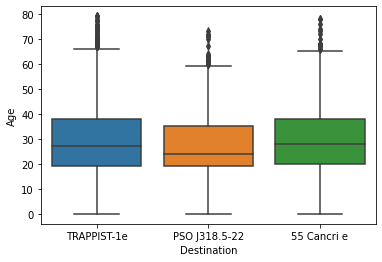

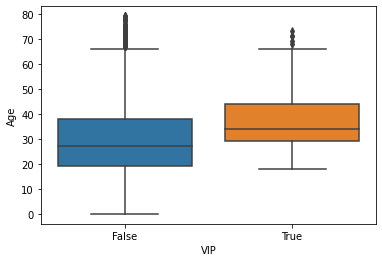

In [16]:
# checking the age distribution across the categorical features
for cat in cat_cols:
    sns.boxplot(x=cat, data=train, y='Age')
    plt.show()

**Insights to Note**
- Most people in VIP were older
- People from Earth were younger

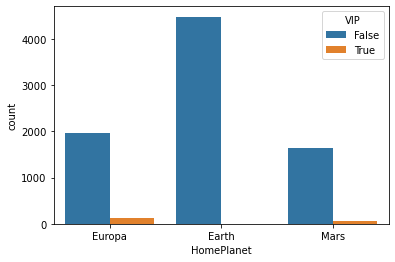

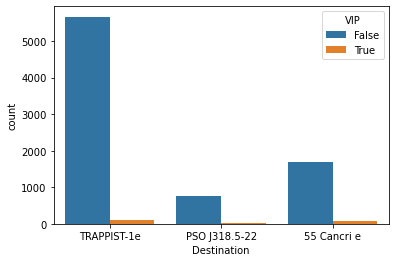

In [17]:
# checking people that are in VIP from HomePlanet and Destination 
for planet in ['HomePlanet', 'Destination']:
    sns.countplot(x=planet, data=train, hue='VIP')
    plt.show()

In [18]:
# checking the actual number of people in VIP from HomePlanet
train.groupby(['HomePlanet', 'VIP']).count()

PassengerId  CryoSleep  Cabin  Destination   Age  \
HomePlanet VIP                                                       
Earth      False         4487       4379   4395         4391  4403   
Europa     False         1958       1903   1902         1923  1912   
           True           131        128    126          129   131   
Mars       False         1653       1611   1620         1611  1613   
           True            63         63     62           63    62   

                  RoomService  FoodCourt  ShoppingMall   Spa  VRDeck  Name  \
HomePlanet VIP                                                               
Earth      False         4387       4391          4378  4389    4377  4382   
Europa     False         1924       1918          1909  1915    1923  1914   
           True           129        128           128   129     129   129   
Mars       False         1620       1618          1619  1618    1616  1613   
           True            61         60            61    63      61    62   

                  Transported  
HomePlanet VIP                 
Earth      False         4487  
Europa     False         1958  
           True           131  
Mars       False         1653  
           True            63

- No one from Earth was in VIP

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

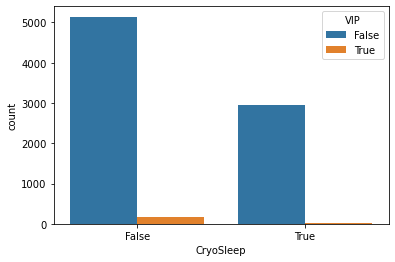

In [19]:
# Checking the CryoSleep column with VIP
sns.countplot(x='CryoSleep', data=train, hue='VIP')

In [20]:
train.groupby(['CryoSleep', 'VIP']).count()

PassengerId  HomePlanet  Cabin  Destination   Age  \
CryoSleep VIP                                                        
False     False         5143        5026   5046         5018  5052   
          True           175         171    169          173   174   
True      False         2941        2867   2858         2894  2861   
          True            21          20     21           21    21   

                 RoomService  FoodCourt  ShoppingMall   Spa  VRDeck  Name  \
CryoSleep VIP                                                               
False     False         5038       5039          5046  5032    5027  5018   
          True           171        171           170   174     172   172   
True      False         2875       2874          2846  2878    2880  2880   
          True            21         20            21    20      20    21   

                 Transported  
CryoSleep VIP                 
False     False         5143  
          True           175  
True      False         2941  
          True            21

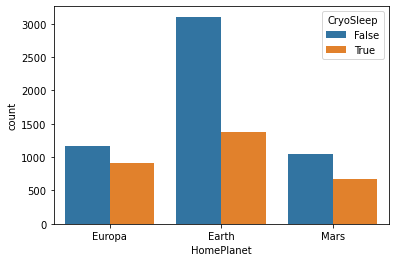

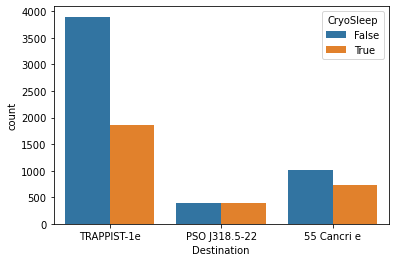

In [21]:
# checking people in CryoSleep from the HomePlanet and Destination
for planet in ['HomePlanet', 'Destination']:
    sns.countplot(x=planet, data=train, hue='CryoSleep')
    plt.show()

Did people in CryoSleep spend any amount in the luxury amenities?

In [30]:
train[train['CryoSleep'] == True].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,2955.000000,2969.0,2967.0,2941.0,2972.0,2975.0
mean,27.405415,0.0,0.0,0.0,0.0,0.0
std,15.080469,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0
25%,18.000000,0.0,0.0,0.0,0.0,0.0
50%,26.000000,0.0,0.0,0.0,0.0,0.0
75%,37.000000,0.0,0.0,0.0,0.0,0.0
max,78.000000,0.0,0.0,0.0,0.0,0.0


If put in CryoSleep, then you cannot spend anything

Checking the spending habits for people in VIP and not in VIP

In [31]:
train.groupby('VIP').describe()

Age                                                     RoomService  \
        count       mean        std   min   25%   50%   75%   max       count   
VIP                                                                             
False  8119.0  28.639611  14.469895   0.0  19.0  27.0  38.0  79.0      8118.0   
True    198.0  37.449495  11.611957  18.0  29.0  34.0  44.0  73.0       195.0   

                   ...    Spa           VRDeck                                 \
             mean  ...    75%      max   count         mean          std  min   
VIP                ...                                                          
False  217.218527  ...   52.0  22408.0  8108.0   282.718056  1084.678230  0.0   
True   473.615385  ...  843.0  13902.0   195.0  1234.856410  2453.060817  0.0   

                                   
       25%   50%     75%      max  
VIP                                
False  0.0   0.0    40.0  24133.0  
True   0.0  30.0  1377.5  12424.0  

[2 rows x 48 columns]

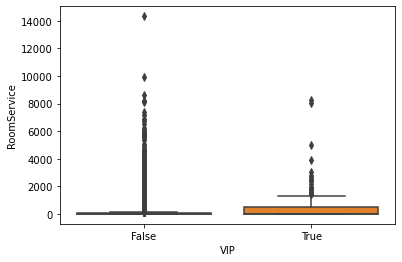

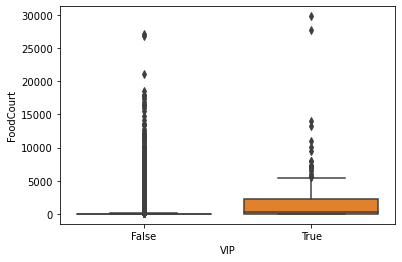

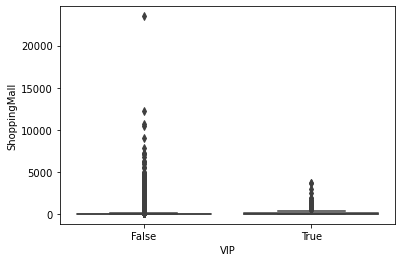

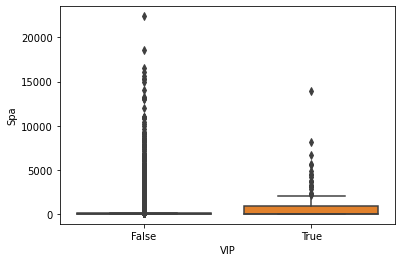

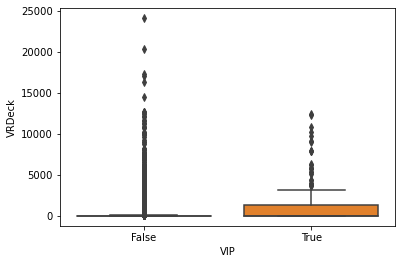

In [41]:
# plot for amount spent by people in VIP
for luxury in num_cols[1:]:
    sns.boxplot(x='VIP', y=luxury, data=train)
    plt.show()

**Recall**
- **PassengerID**. 
Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

Extracting the group number

In [44]:
train['GroupNo'] = train['PassengerId'].apply(lambda x: x.split('_')[0])

In [50]:
test['GroupNo'] = test['PassengerId'].apply(lambda x: x.split('_')[0])

In [47]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupNo
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280


In [51]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupNo
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0021
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0023


In [48]:
train.groupby(['GroupNo', 'HomePlanet']).count()

,,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
GroupNo,HomePlanet,,,,,,,,,,,,,
0001,Europa,1,1,1,1,1,1,1,1,1,1,1,1,1
0002,Earth,1,1,1,1,1,1,1,1,1,1,1,1,1
0003,Europa,2,2,2,2,2,2,2,2,2,2,2,2,2
0004,Earth,1,1,1,1,1,1,1,1,1,1,1,1,1
0005,Earth,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9275,Europa,3,2,3,3,3,3,3,3,3,3,3,3,3
9276,Europa,1,1,1,1,1,1,1,1,1,1,1,1,1
9278,Earth,1,1,1,1,1,1,1,1,1,1,1,1,1


In [61]:
train.groupby('GroupNo').count().sort_values(by='PassengerId', ascending=False)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
GroupNo,,,,,,,,,,,,,,
4498,8,8,8,8,8,8,8,8,8,8,8,7,8,8
8168,8,8,8,8,8,7,8,8,8,7,7,8,8,8
8728,8,8,7,7,8,8,8,8,8,8,8,8,8,8
8796,8,8,8,8,8,8,8,7,8,8,8,8,8,8
8956,8,8,8,8,7,7,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3483,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3480,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3478,1,1,1,1,1,1,1,1,1,1,1,1,1,1


- **People travelling in the same group have the same Cabin No and are from the same HomePlanet**

In [54]:
train[train['Cabin'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupNo
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False,0012
93,0101_01,Mars,True,NaN,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Book Trad,True,0101
103,0110_01,Europa,False,NaN,TRAPPIST-1e,32.0,False,0.0,410.0,6.0,3929.0,764.0,Graviph Aloubtled,False,0110
222,0239_01,Mars,False,NaN,TRAPPIST-1e,37.0,False,637.0,0.0,0.0,92.0,319.0,Diedow Resty,False,0239
227,0244_01,Mars,True,NaN,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Froos Sad,True,0244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8209,8772_02,Europa,False,NaN,55 Cancri e,53.0,False,0.0,1127.0,0.0,3939.0,NaN,Naosura Motled,False,8772
8475,9057_01,Europa,False,NaN,55 Cancri e,36.0,True,132.0,3479.0,0.0,3786.0,0.0,Coxan Statch,False,9057
8485,9069_03,Europa,True,NaN,55 Cancri e,25.0,False,0.0,0.0,0.0,0.0,0.0,Bath Brakeng,True,9069
8509,9081_03,Earth,True,NaN,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Beula Clemondsey,False,9081


**Combining the Datasets for easy Preprocessing**

In [58]:
# Getting the last index of training data
ntrain = train.shape[0]

# Combining the 2 Dataframes
all_data = pd.concat([train, test]).reset_index(drop=True)

In [96]:
all_data.shape

(12970, 15)

In [99]:
all_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupNo
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,9266
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,9269
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,9271
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,9273


**Extracting Features from the Cabin Feature**

In [135]:
def extract_deck(cabin):
    if pd.isnull(cabin):
        return np.nan
    else:
        return cabin.split('/')[0]
    
    

# Data Cleaning

In [80]:
all_data.isna().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
GroupNo            0
dtype: int64

In [101]:
all_data.nunique()

PassengerId     12970
HomePlanet          3
CryoSleep           2
Cabin            9825
Destination         3
Age                80
VIP                 2
RoomService      1578
FoodCourt        1953
ShoppingMall     1367
Spa              1679
VRDeck           1642
Name            12629
Transported         2
GroupNo          9280
dtype: int64

Filling the Cabin null values of people in the same group

In [86]:
all_data[all_data['Cabin'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupNo
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False,0012
93,0101_01,Mars,True,NaN,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Book Trad,True,0101
103,0110_01,Europa,False,NaN,TRAPPIST-1e,32.0,False,0.0,410.0,6.0,3929.0,764.0,Graviph Aloubtled,False,0110
222,0239_01,Mars,False,NaN,TRAPPIST-1e,37.0,False,637.0,0.0,0.0,92.0,319.0,Diedow Resty,False,0239
227,0244_01,Mars,True,NaN,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Froos Sad,True,0244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12902,9138_01,Europa,NaN,NaN,TRAPPIST-1e,41.0,False,0.0,1998.0,0.0,1023.0,867.0,Misamak Trupistic,NaN,9138
12941,9223_01,Mars,True,NaN,TRAPPIST-1e,24.0,False,0.0,0.0,NaN,0.0,0.0,Weessh Sun,NaN,9223
12942,9223_02,Mars,True,NaN,TRAPPIST-1e,17.0,False,0.0,0.0,0.0,0.0,0.0,Perit Sun,NaN,9223
12951,9238_05,Earth,True,NaN,TRAPPIST-1e,14.0,False,0.0,0.0,0.0,0.0,0.0,Caseye Emenez,NaN,9238


In [81]:
# creating a series with GroupNo as the index and its respective Cabin mode
groupno_cabin_mode = all_data.groupby('GroupNo')['Cabin'].agg(pd.Series.mode)

In [121]:
groupno_cabin_mode['9269']

array([], dtype=object)

In [122]:
# Removing empty values in the series
groupno_cabin_mode = groupno_cabin_mode.apply(lambda x: x if len(x)>1 else np.nan)

In [126]:
all_data['Cabin'] = all_data['Cabin'].fillna(all_data['GroupNo'].map(groupno_cabin_mode))

In [128]:
all_data['Cabin'].isna().sum()

162

- Cabin null values have reduced from 299 to 162

In [129]:
all_data[all_data['Cabin'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupNo
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False,0012
93,0101_01,Mars,True,NaN,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Book Trad,True,0101
222,0239_01,Mars,False,NaN,TRAPPIST-1e,37.0,False,637.0,0.0,0.0,92.0,319.0,Diedow Resty,False,0239
272,0301_01,Earth,True,NaN,TRAPPIST-1e,16.0,False,0.0,0.0,0.0,0.0,0.0,Margia Wriggins,False,0301
280,0310_01,Europa,False,NaN,TRAPPIST-1e,67.0,False,NaN,230.0,0.0,4476.0,241.0,Naviton Coudered,False,0310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12869,9058_01,Mars,False,NaN,TRAPPIST-1e,38.0,NaN,784.0,0.0,42.0,38.0,10.0,Hammet Muff,NaN,9058
12902,9138_01,Europa,NaN,NaN,TRAPPIST-1e,41.0,False,0.0,1998.0,0.0,1023.0,867.0,Misamak Trupistic,NaN,9138
12941,9223_01,Mars,True,NaN,TRAPPIST-1e,24.0,False,0.0,0.0,NaN,0.0,0.0,Weessh Sun,NaN,9223
12942,9223_02,Mars,True,NaN,TRAPPIST-1e,17.0,False,0.0,0.0,0.0,0.0,0.0,Perit Sun,NaN,9223
